# Data Cleaning process
+ Task
    - three files collected from the GCP are combined into one file
    - duplicates are dropped to convert the file to column dataframe 
+ Author
    - Vignesh Padmanabhan
+ Date
    - 15-07-2021

In [1]:
from glob import glob
import pandas as pd

In [2]:
inverter_blo_01 = sorted(glob('trafo_03/bq-results-20211007-184631-fgh895lauiqp_*.csv'))
inverter_blo_01

['trafo_03\\bq-results-20211007-184631-fgh895lauiqp_1.csv',
 'trafo_03\\bq-results-20211007-184631-fgh895lauiqp_2.csv',
 'trafo_03\\bq-results-20211007-184631-fgh895lauiqp_3.csv']

In [3]:
inverter_blo_01

['trafo_03\\bq-results-20211007-184631-fgh895lauiqp_1.csv',
 'trafo_03\\bq-results-20211007-184631-fgh895lauiqp_2.csv',
 'trafo_03\\bq-results-20211007-184631-fgh895lauiqp_3.csv']

In [6]:
new_file = pd.concat((pd.read_csv(file) for file in inverter_blo_01),ignore_index = True)

In [7]:
new_file.head()

plant         rnoc_tag_name value_type  \
0  GHANI       AVERAGE_CURRENT     number   
1  GHANI        REACTIVE_POWER     number   
2  GHANI  EXPORT_ACTIVE_ENERGY     number   
3  GHANI     R-Y_PHASE_VOLTAGE     number   
4  GHANI  IMPORT_ACTIVE_ENERGY     number   

                                    source_id_neuron  value_float  quality  \
0  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00      192   
1  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00      192   
2  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...  10333454.00      192   
3  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...       527.35      192   
4  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00      192   

                 timestamp  
0  2020-12-01 00:05:00 UTC  
1  2020-12-01 00:05:00 UTC  
2  2020-12-01 00:05:00 UTC  
3  2020-12-01 00:05:00 UTC  
4  2020-12-01 00:05:00 UTC

In [8]:
new_file.rnoc_tag_name.unique()

array(['AVERAGE_CURRENT', 'REACTIVE_POWER', 'EXPORT_ACTIVE_ENERGY',
       'R-Y_PHASE_VOLTAGE', 'IMPORT_ACTIVE_ENERGY', 'B-R_PHASE_VOLTAGE',
       'APPARENT_POWER', 'OIL_TEMPERATURE', 'B_PHASE_CURRENT',
       'POWER_FACTOR', 'R_PHASE_CURRENT', 'Y_PHASE_CURRENT',
       'EXPORT_REACTIVE_ENERGY', 'Y-N_VOLTAGE', 'ACTIVE_POWER',
       'IMPORT_REACTIVE_ENERGY', 'B-N_VOLTAGE', 'Y-B_PHASE_VOLTAGE',
       'FREQUENCY', 'R-N_VOLTAGE', 'WINDING_TEMPERATURE'], dtype=object)

In [9]:
new_file.source_id_neuron

0           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
1           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
2           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
3           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
4           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
                                  ...                        
20734261    /GHANI_531C/BLK/BLK03/RHS_LT_PANEL/MFM_LT_PANE...
20734262    /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
20734263    /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
20734264    /GHANI_531C/BLK/BLK03/VCB_PANEL/MFM_VCB_PANEL/...
20734265    /GHANI_531C/BLK/BLK03/VCB_PANEL/MFM_VCB_PANEL/...
Name: source_id_neuron, Length: 20734266, dtype: object

In [10]:
new_file.drop(columns = {'plant','rnoc_tag_name','value_type','quality'},inplace=True)

In [11]:
# new_file.to_csv("combined_source_file.csv")

In [12]:
new_file['timestamp'] = pd.to_datetime(new_file['timestamp'])

In [13]:
new_file.set_index('timestamp',inplace=True)

In [14]:
new_file = new_file.tz_convert('Asia/Kolkata')

In [15]:
new_file.head()

source_id_neuron  \
timestamp                                                                      
2020-12-01 05:35:00+05:30  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...   
2020-12-01 05:35:00+05:30  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...   
2020-12-01 05:35:00+05:30  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...   
2020-12-01 05:35:00+05:30  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...   
2020-12-01 05:35:00+05:30  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...   

                           value_float  
timestamp                               
2020-12-01 05:35:00+05:30         0.00  
2020-12-01 05:35:00+05:30         0.00  
2020-12-01 05:35:00+05:30  10333454.00  
2020-12-01 05:35:00+05:30       527.35  
2020-12-01 05:35:00+05:30         0.00

In [16]:
new_file.reset_index('timestamp',inplace=True)

In [17]:
new_file.source_id_neuron

0           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
1           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
2           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
3           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
4           /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
                                  ...                        
20734261    /GHANI_531C/BLK/BLK03/RHS_LT_PANEL/MFM_LT_PANE...
20734262    /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
20734263    /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...
20734264    /GHANI_531C/BLK/BLK03/VCB_PANEL/MFM_VCB_PANEL/...
20734265    /GHANI_531C/BLK/BLK03/VCB_PANEL/MFM_VCB_PANEL/...
Name: source_id_neuron, Length: 20734266, dtype: object

In [16]:
data= new_file["source_id_neuron"].str.split("/GHANI_531C/BLK/BLK03", n = 1, expand = True)

In [17]:
data[0]

0            
1            
2            
3            
4            
           ..
20734261     
20734262     
20734263     
20734264     
20734265     
Name: 0, Length: 20734266, dtype: object

In [18]:
data[1]

0                /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT
1                 /LHS_LT_PANEL/MFM_LT_PANEL/REACTIVE_POWER
2           /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY
3              /LHS_LT_PANEL/MFM_LT_PANEL/R_Y_PHASE_VOLTAGE
4           /LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_ACTIVE_ENERGY
                                 ...                       
20734261       /RHS_LT_PANEL/MFM_LT_PANEL/R_Y_PHASE_VOLTAGE
20734262       /LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE
20734263             /LHS_LT_PANEL/MFM_LT_PANEL/R_N_VOLTAGE
20734264                 /VCB_PANEL/MFM_VCB_PANEL/FREQUENCY
20734265         /VCB_PANEL/MFM_VCB_PANEL/Y_B_PHASE_VOLTAGE
Name: 1, Length: 20734266, dtype: object

In [19]:
new_file["tag_name"]= data[1]

In [20]:
new_file.head()

timestamp  \
0 2020-12-01 05:35:00+05:30   
1 2020-12-01 05:35:00+05:30   
2 2020-12-01 05:35:00+05:30   
3 2020-12-01 05:35:00+05:30   
4 2020-12-01 05:35:00+05:30   

                                    source_id_neuron  value_float  \
0  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00   
1  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00   
2  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...  10333454.00   
3  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...       527.35   
4  /GHANI_531C/BLK/BLK03/LHS_LT_PANEL/MFM_LT_PANE...         0.00   

                                          tag_name  
0       /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  
1        /LHS_LT_PANEL/MFM_LT_PANEL/REACTIVE_POWER  
2  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY  
3     /LHS_LT_PANEL/MFM_LT_PANEL/R_Y_PHASE_VOLTAGE  
4  /LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_ACTIVE_ENERGY

In [21]:
new_file.drop(columns = {'source_id_neuron'},inplace=True)

In [22]:
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20734266 entries, 0 to 20734265
Data columns (total 3 columns):
 #   Column       Dtype                       
---  ------       -----                       
 0   timestamp    datetime64[ns, Asia/Kolkata]
 1   value_float  float64                     
 2   tag_name     object                      
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1), object(1)
memory usage: 474.6+ MB


In [23]:
new_file.tag_name.unique()

array(['/LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT',
       '/LHS_LT_PANEL/MFM_LT_PANEL/REACTIVE_POWER',
       '/LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY',
       '/LHS_LT_PANEL/MFM_LT_PANEL/R_Y_PHASE_VOLTAGE',
       '/LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_ACTIVE_ENERGY',
       '/VCB_PANEL/MFM_VCB_PANEL/AVERAGE_CURRENT',
       '/LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE',
       '/LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER', '/IDT_TRAFO/OTI',
       '/LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT',
       '/LHS_LT_PANEL/MFM_LT_PANEL/POWER_FACTOR',
       '/VCB_PANEL/MFM_VCB_PANEL/REACTIVE_POWER',
       '/RHS_LT_PANEL/MFM_LT_PANEL/R_PHASE_CURRENT',
       '/RHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE',
       '/VCB_PANEL/MFM_VCB_PANEL/APPARENT_POWER',
       '/LHS_LT_PANEL/MFM_LT_PANEL/Y_PHASE_CURRENT',
       '/RHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY',
       '/RHS_LT_PANEL/MFM_LT_PANEL/Y_N_VOLTAGE',
       '/VCB_PANEL/MFM_VCB_PANEL/IMPORT_ACTIVE_ENERGY',
       '/VCB_PANEL/

In [26]:
new_file.to_csv("trafo_03_first_draft/first_cut_transformer_3_v1.csv")

In [27]:
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20734266 entries, 0 to 20734265
Data columns (total 3 columns):
 #   Column       Dtype                       
---  ------       -----                       
 0   timestamp    datetime64[ns, Asia/Kolkata]
 1   value_float  float64                     
 2   tag_name     object                      
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1), object(1)
memory usage: 474.6+ MB


In [28]:
data_tidy = new_file.pivot_table(
    index='timestamp',
    columns = 'tag_name',
    values ='value_float',
    dropna = False
)

In [29]:
data_tidy.head()

tag_name                   /IDT_TRAFO/OTI  /IDT_TRAFO/WTI  \
timestamp                                                   
2020-12-01 05:35:00+05:30           30.30           31.87   
2020-12-01 05:40:00+05:30           30.28           31.80   
2020-12-01 05:45:00+05:30           30.28           31.80   
2020-12-01 05:50:00+05:30           30.28           31.78   
2020-12-01 05:55:00+05:30           30.08           31.63   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER  \
timestamp                                                            
2020-12-01 05:35:00+05:30                                      NaN   
2020-12-01 05:40:00+05:30                                      NaN   
2020-12-01 05:45:00+05:30                                      NaN   
2020-12-01 05:50:00+05:30                                      NaN   
2020-12-01 05:55:00+05:30                                      NaN   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER  \
timestamp                                                              
2020-12-01 05:35:00+05:30                                        0.0   
2020-12-01 05:40:00+05:30                                        0.0   
2020-12-01 05:45:00+05:30                                        0.0   
2020-12-01 05:50:00+05:30                                        0.0   
2020-12-01 05:55:00+05:30                                        0.0   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  \
timestamp                                                               
2020-12-01 05:35:00+05:30                                         0.0   
2020-12-01 05:40:00+05:30                                         0.0   
2020-12-01 05:45:00+05:30                                         0.0   
2020-12-01 05:50:00+05:30                                         0.0   
2020-12-01 05:55:00+05:30                                         0.0   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE  \
timestamp                                                           
2020-12-01 05:35:00+05:30                                  299.60   
2020-12-01 05:40:00+05:30                                  298.61   
2020-12-01 05:45:00+05:30                                  299.01   
2020-12-01 05:50:00+05:30                                  299.34   
2020-12-01 05:55:00+05:30                                  299.09   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT  \
timestamp                                                               
2020-12-01 05:35:00+05:30                                         0.0   
2020-12-01 05:40:00+05:30                                         0.0   
2020-12-01 05:45:00+05:30                                         0.0   
2020-12-01 05:50:00+05:30                                         0.0   
2020-12-01 05:55:00+05:30                                         0.0   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE  \
timestamp                                                                 
2020-12-01 05:35:00+05:30                                        523.17   
2020-12-01 05:40:00+05:30                                        521.33   
2020-12-01 05:45:00+05:30                                        522.08   
2020-12-01 05:50:00+05:30                                        522.67   
2020-12-01 05:55:00+05:30                                        522.21   

tag_name                   /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY  \
timestamp                                                                    
2020-12-01 05:35:00+05:30                                       10333454.0   
2020-12-01 05:40:00+05:30                                       10333454.0   
2020-12-01 05:45:00+05:30                                       10333454.0   
2020-12-01 05:50:00+05:30                                       10333454.0   
2020-12-01 05:55:00+05:30                                       10333454.0

In [30]:
data_tidy.isnull().sum()/len(data_tidy)*100

tag_name
/IDT_TRAFO/OTI                                       97.657284
/IDT_TRAFO/WTI                                       97.091580
/LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER              96.499671
/LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER            95.990701
/LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT           95.968914
/LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE               95.899323
/LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT           95.963795
/LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE         94.771655
/LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY      96.004820
/LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY    99.452389
/LHS_LT_PANEL/MFM_LT_PANEL/FREQUENCY                 99.300701
/LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_ACTIVE_ENERGY      99.500918
/LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_REACTIVE_ENERGY    95.896799
/LHS_LT_PANEL/MFM_LT_PANEL/POWER_FACTOR              98.939913
/LHS_LT_PANEL/MFM_LT_PANEL/REACTIVE_POWER            96.350905
/LHS_LT_PANEL/MFM_LT_PANEL/R_N_VOLTAGE        

In [36]:
import missingno as msno

<AxesSubplot:>

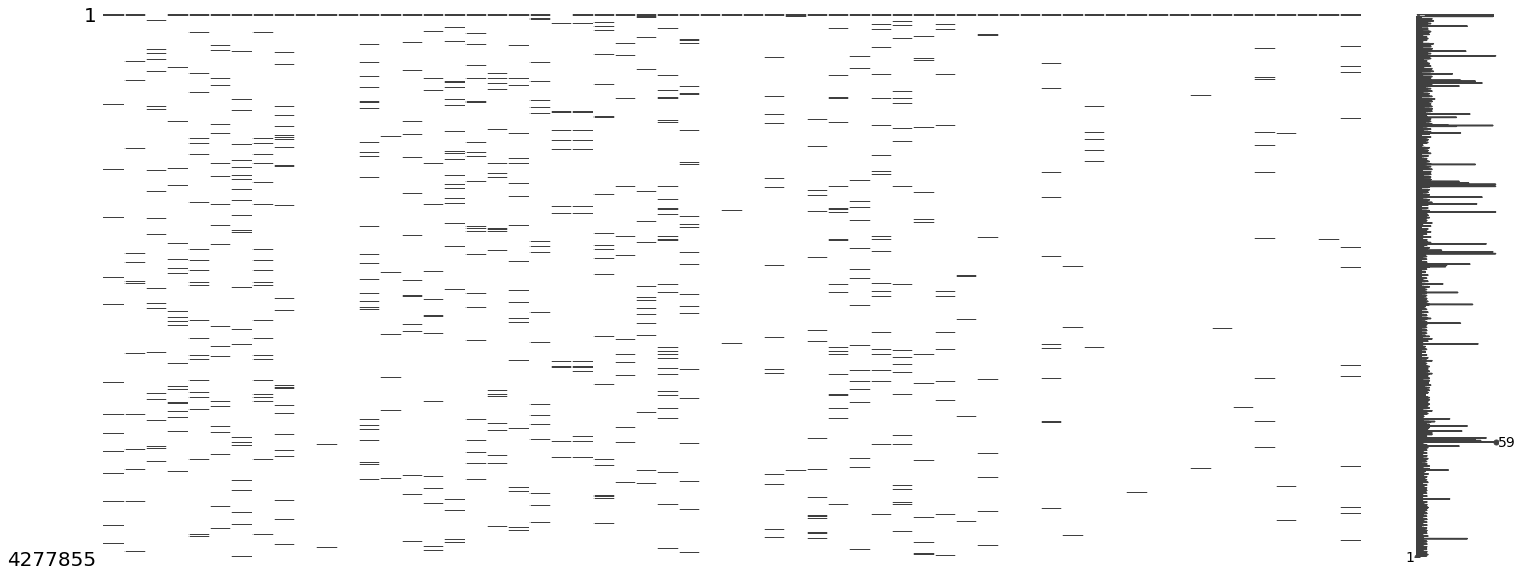

In [38]:
msno.matrix(data_tidy)

In [31]:
pd.DataFrame(data_tidy.columns).to_csv("trafo_03_first_draft/column_list.csv")

In [49]:
data_tidy1 = data_tidy.copy()
data_tidy2 = data_tidy.copy()

In [50]:
data_tidy1.reset_index(inplace=True)

In [53]:
data_tidy1.drop(columns = {'timestamp'},inplace=True)

In [57]:
data_tidy1_1 = data_tidy1.copy()

In [58]:
data_tidy1_1.dropna(thresh=2,inplace = True)

<AxesSubplot:>

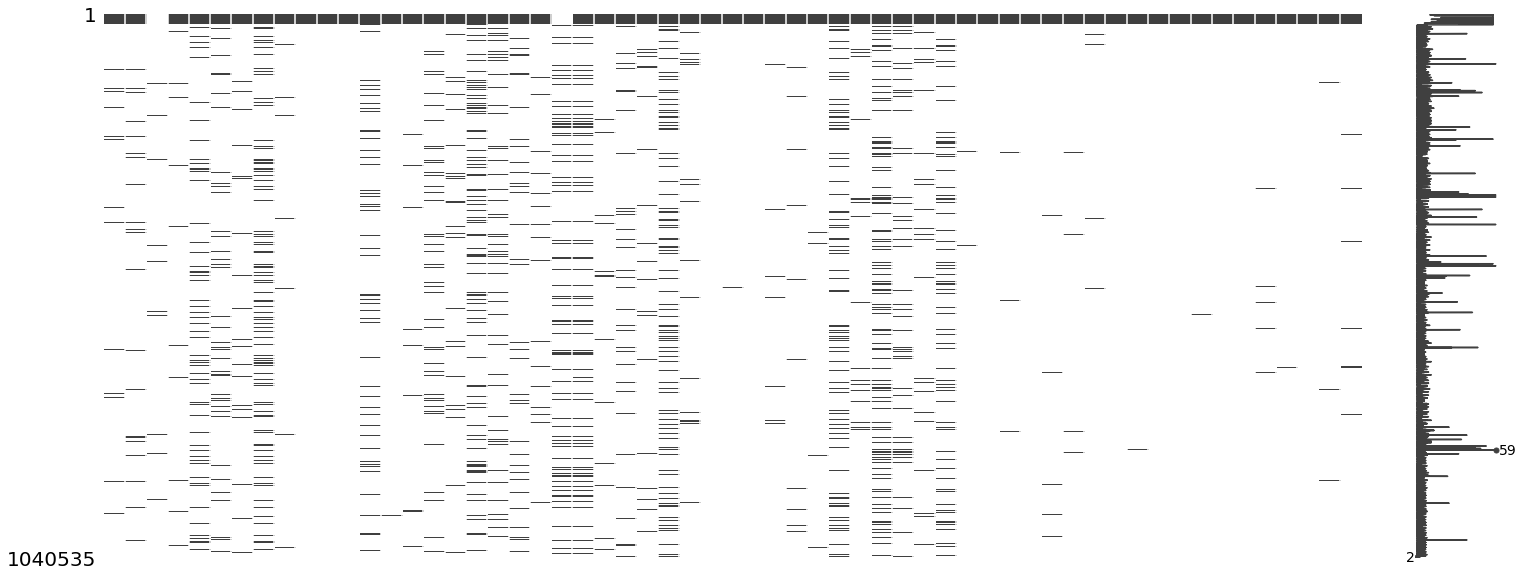

In [59]:
msno.matrix(data_tidy1_1)

In [62]:
data_tidy.describe()

tag_name  /IDT_TRAFO/OTI  /IDT_TRAFO/WTI  \
count      100218.000000   124418.000000   
mean           44.991641       51.723386   
std            11.005169       17.495062   
min             0.000000        0.000000   
25%            36.010000       38.500000   
50%            43.090000       48.120000   
75%            53.060000       61.590000   
max            84.419998      150.000000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER  \
count                               149739.000000   
mean                                  1142.401444   
std                                    841.131446   
min                                      0.000000   
25%                                    377.625000   
50%                                   1012.190000   
75%                                   1887.714976   
max                                   3091.760000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER  \
count                                  1.715120e+05   
mean                                   8.115229e+04   
std                                    3.768915e+05   
min                                    0.000000e+00   
25%                                    2.795550e+02   
50%                                    9.946700e+02   
75%                                    2.020350e+03   
max                                    2.908290e+06   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  \
count                                  172444.000000   
mean                                     1225.311489   
std                                       995.160678   
min                                         0.000000   
25%                                       287.600000   
50%                                      1037.980000   
75%                                      2091.207500   
max                                      3597.670000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE  \
count                              175421.000000   
mean                                  298.677471   
std                                     7.477744   
min                                     0.000000   
25%                                   294.540000   
50%                                   299.830000   
75%                                   303.530000   
max                                   311.660000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT  \
count                                  172663.000000   
mean                                     1223.466320   
std                                       993.594525   
min                                         0.000000   
25%                                       286.995000   
50%                                      1036.040000   
75%                                      2089.260000   
max                                      3598.150000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE  \
count                                    223661.000000   
mean                                        520.722333   
std                                          12.534439   
min                                           0.000000   
25%                                         513.250000   
50%                                         522.770000   
75%                                         529.270000   
max                                         542.460000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY  \
count                                        1.709080e+05   
mean                                         2.781377e+06   
std                                          2.817318e+06   
min                                          0.000000e+00   
25%                                          1.222632e+06   
50%                                          2.139075e+06   
75%                                          2.959690e+06   
max                                          1.133416e+07   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY  ...  \
count    

In [60]:
data_tidy1_1.describe()

tag_name  /IDT_TRAFO/OTI  /IDT_TRAFO/WTI  \
count       52538.000000    57872.000000   
mean           43.210068       49.869388   
std            10.991907       19.258436   
min             0.000000        0.000000   
25%            34.130000       36.000000   
50%            41.040000       44.730000   
75%            51.510000       59.560000   
max            83.290001      150.000000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER  \
count                                17042.000000   
mean                                  1190.649816   
std                                    840.113442   
min                                      0.000000   
25%                                    425.860000   
50%                                   1107.675000   
75%                                   1959.850000   
max                                   3085.530000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER  \
count                                  4.009900e+04   
mean                                   3.434052e+05   
std                                    7.195904e+05   
min                                    0.000000e+00   
25%                                    0.000000e+00   
50%                                    1.040890e+03   
75%                                    5.078500e+04   
max                                    2.908290e+06   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  \
count                                  131472.000000   
mean                                     1235.139493   
std                                      1010.269018   
min                                         0.000000   
25%                                       256.297500   
50%                                      1062.185000   
75%                                      2128.197500   
max                                      3597.670000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE  \
count                               84143.000000   
mean                                  300.295932   
std                                     8.480782   
min                                     0.000000   
25%                                   297.929996   
50%                                   301.960000   
75%                                   304.900000   
max                                   311.370000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT  \
count                                   53032.000000   
mean                                     1024.980798   
std                                      1007.947129   
min                                         0.000000   
25%                                        63.280000   
50%                                       734.815000   
75%                                      1838.162500   
max                                      3583.740000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE  \
count                                    198884.000000   
mean                                        520.126347   
std                                          12.727593   
min                                           0.000000   
25%                                         512.510000   
50%                                         522.030000   
75%                                         528.740000   
max                                         542.460000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY  \
count                                        3.479400e+04   
mean                                         5.938470e+06   
std                                          4.842444e+06   
min                                          0.000000e+00   
25%                                          9.576442e+05   
50%                                          3.320239e+06   
75%                                          1.078609e+07   
max                                          1.133416e+07   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY  ...  \
count    

In [71]:
final_df.describe()

tag_name  /IDT_TRAFO/OTI  /IDT_TRAFO/WTI  \
count       41362.000000    41362.000000   
mean           46.420515       55.713756   
std            11.206906       24.659742   
min            22.715012       23.740562   
25%            36.817181       39.176592   
50%            45.367344       49.746468   
75%            55.040000       64.268148   
max            82.638491      150.000000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER  \
count                                30380.000000   
mean                                  1179.183095   
std                                    805.168116   
min                                      0.000000   
25%                                    450.237646   
50%                                   1082.755427   
75%                                   1888.376877   
max                                   2987.923591   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER  \
count                                  4.136200e+04   
mean                                   3.332112e+05   
std                                    7.108402e+05   
min                                    0.000000e+00   
25%                                    6.291923e+02   
50%                                    1.588973e+03   
75%                                    4.595750e+04   
max                                    2.908290e+06   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  \
count                                   41362.000000   
mean                                     1373.116429   
std                                       955.088725   
min                                         0.000000   
25%                                       486.941566   
50%                                      1269.545853   
75%                                      2236.006408   
max                                      3475.580000   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE  \
count                               41362.000000   
mean                                  294.112144   
std                                     6.912815   
min                                     3.517720   
25%                                   289.660000   
50%                                   294.770000   
75%                                   298.858771   
max                                   311.288710   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT  \
count                                   41362.000000   
mean                                     1372.004326   
std                                       953.210248   
min                                         0.000000   
25%                                       488.492671   
50%                                      1269.469356   
75%                                      2235.556002   
max                                      3482.470476   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE  \
count                                     41362.000000   
mean                                        512.411634   
std                                          11.308042   
min                                           6.118267   
25%                                         504.831324   
50%                                         513.036480   
75%                                         520.119977   
max                                         541.712538   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY  \
count                                        4.136200e+04   
mean                                         3.754802e+06   
std                                          3.776188e+06   
min                                          7.213000e+01   
25%                                          1.268724e+06   
50%                                          2.374617e+06   
75%                                          3.288992e+06   
max                                          1.133416e+07   

tag_name  /LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY  ...  \
count    

In [63]:
final_df = data_tidy2.interpolate(method='time')

In [64]:
final_df =final_df.resample('5min').mean()

In [65]:
final_df = final_df.drop_duplicates()

In [66]:
final_df = final_df.between_time('6:30', '18:30')

In [67]:
final_df.shape

(41363, 59)

In [68]:
final_df.isnull().sum()/len(final_df)*100

tag_name
/IDT_TRAFO/OTI                                        0.002418
/IDT_TRAFO/WTI                                        0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER              26.552716
/LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER             0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT            0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE                0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT            0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/B_R_PHASE_VOLTAGE          0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_ACTIVE_ENERGY       0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/EXPORT_REACTIVE_ENERGY     0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/FREQUENCY                  0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_ACTIVE_ENERGY       0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/IMPORT_REACTIVE_ENERGY     0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/POWER_FACTOR               0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/REACTIVE_POWER             0.002418
/LHS_LT_PANEL/MFM_LT_PANEL/R_N_VOLTAGE        

In [74]:
final_df.shape

(41363, 59)

In [77]:
final_df.dropna(inplace=True)

In [78]:
final_df.shape

(30380, 59)

In [79]:
final_df.to_csv('trafo_03_first_draft/dataset_transformer_3_v1.csv')